# Numerische Integration:

Hier wenden wir das Trapez und Simpson Verfahren an, um numerisch Funktionen zu integrieren. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Zunächst definieren wir eine Funktion (hier eine einfache Exponentialfunktion)

In [2]:
def f(x):
    return np.exp(x) 


### Trapezregel

In [9]:
def trapez_integration(f,a,b,N, plot=False, plot_a = np.nan, plot_b = np.nan):

   '''
   *****************************************************************
    Funktion trapez_integration
    Trapezregel zur Integration uber eine Funktion f
   *****************************************************************

    sum = trapez_integration(f,a,b,N)
    Input:
    f - Name der Funktion, uber die integriert wird (in Hochkomma oder mit @)
    a - untere Integrationsgrenze
    b - obere Integrationsgrenze
    N - Zahl der Intervalle
    Output
   % sum - Ergebnis

   '''

   if plot:
      if np.isnan(plot_a):
         plot_a = a
      if np.isnan(plot_b):
         plot_b = b

      x_plot = np.linspace(plot_a,plot_b,N*100)
      plt.figure(figsize=(15,10))
      plt.plot(x_plot,f(x_plot))
      x_plot = np.linspace(a,b,N)
      plt.fill_between(x_plot,f(x_plot),alpha=0.5)
      plt.show()
   h = (b-a)/N # Intervallbreite
   sum = 0 # Startwert = 0
   for k in np.arange(1,N+1):
      x = a + h*k
      sum = sum + f(x)
   sum = h/2*(f(x) + f(b)) + h*sum 
   return sum

Hier könnt ihr für die Exponentialfunktion Integrale interaktiv für verschiedene Grenzen und Anzahl an Stützstellen berechnen:

Geben Sie die beiden Grenzen des Integrals sowie die Anzahl der Stützstellen ein:
untere Grenze eingeben:0
obere Grenze eingeben:10
Anzahl der Stützstellen eingeben:11
[0.00000000e+00 9.09918107e-03 1.81983621e-02 ... 9.98180164e+00
 9.99090082e+00 1.00000000e+01]


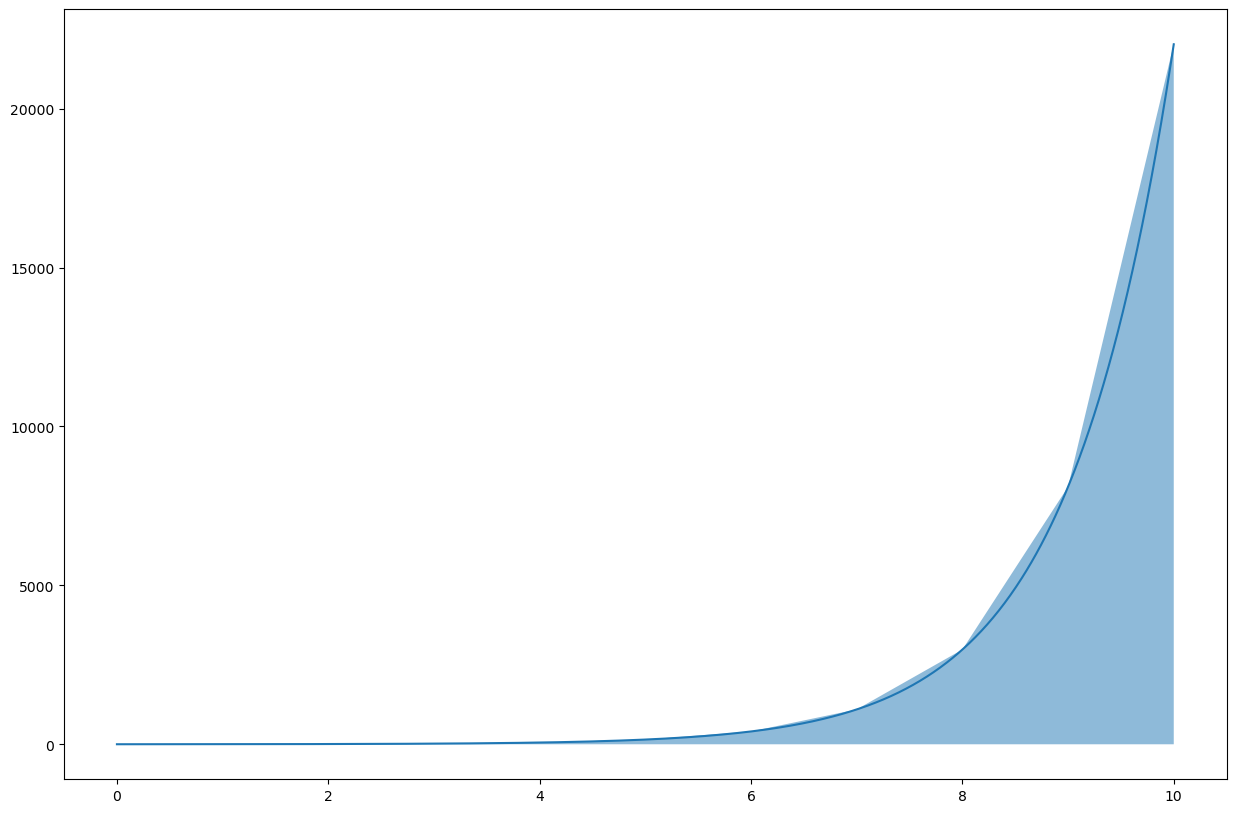

Das Integral lautet:  53557.515130796426


In [10]:
# %***********************************************************
# % M-Script zur Bestimmung des Integrals mittels Trapezformel
# %***********************************************************

# % Eingabe
print('Geben Sie die beiden Grenzen des Integrals sowie die Anzahl der Stützstellen ein:')
a = int(input('untere Grenze eingeben:'))
b = int(input('obere Grenze eingeben:'))
N = int(input('Anzahl der Stützstellen eingeben:'))
# % Rechnung
int_trap = trapez_integration(np.exp,a,b,N, plot=True)

# % Ausgabe
print('Das Integral lautet: ', int_trap)

### Simpson Regel:

In [5]:
def simpson_integration(f,a,b,N):
    '''
    %***********************************************************************
    % Funktion simp.m
    % Simpson-Regel zur Integration über eine Funktion fun
    %***********************************************************************

    % sum = simp(fun,a,b,M)
    % Input:
    %   fun - Name der Funktion, über die integriert wird (in Hochkomma oder mit @)
    %   a - untere Integrationsgrenze
    %   b - obere Integrationsgrenze
    %   N - Zahl der Intervalle
    % 0utput
    %   sum - Ergebnis
    '''

    h =(b-a)/(2*N)   # Intervallbreite
    print("Intervallbreite h: ",h)

    sum1, sum2 = 0, 0
    for k in np.arange(1, N+1):
        x = a + h*(2*k-1)
        sum1 = sum1 + f(x)
    for k in np.arange(1, N):
        x = a + h*2*k
        sum2 = sum2 + f(x)
    sum = h/3*(f(b)+ f(a) + 4*sum1 + 2*sum2)
    return sum

In [6]:
# %***********************************************************
# % Python-Script zur Bestimmung des Integrals mittels Simpsonformel
# %***********************************************************

# % Eingabe
print('Geben Sie die beiden Grenzen des Integrals sowie die Anzahl der Stützstellen ein:')
a = int(input('untere Grenze eingeben:'))
b = int(input('obere Grenze eingeben:'))
N = int(input('Anzahl der Stützstellen eingeben:'))

# % Rechnung
int_trap = simpson_integration(np.exp, a, b, N)

# % Ausgabe
print('Das Integral lautet: ', int_trap)

Geben Sie die beiden Grenzen des Integrals sowie die Anzahl der Stützstellen ein:


KeyboardInterrupt: Interrupted by user

### Anwendung der Integration an Niederschlagsdaten:

Wir nutzen nun die numerischen Integrationsregeln, um anhand von jährlichen Niederschlagssummen der Wetterstation am Telegrafenberg, 
die Wahrscheinlichkeit von bestimmten Niederschlagssummen zu berechnen:

Dazu lesen wir die Daten ein:

In [ ]:
data_year = pd.read_csv("data/niederschlag_jahreswerte.csv",index_col=0)


Berechnen die Normalverteilunfunktion anhand des Mittelwertes und der Standardabweichung:

In [ ]:

mu = np.mean(data_year.values) # Mittelwert
sigma = np.std(data_year.values) # Standardabweichung

def niederschlag_norm(t,sigma=sigma,mu=mu):
    f = (1 / (sigma * np.sqrt(2*np.pi))) * np.exp(-1/2* ((t - mu)/sigma)**2)
    return f



Hier sind die berechnete Normalverteilungsfunktion und das Histogram der Daten geplottet:

In [ ]:

t = np.linspace(mu - sigma * 4, mu + sigma * 4,1000)
plt.plot(t,niederschlag_norm(t))
plt.hist(data_year.values,density=True)
plt.ylabel("Dichteverteilung")
plt.xlabel("Jahresniederschlag [mm]")
plt.show()

Wir sortieren nun die Werte und geben uns die 10 niedrigsten an (`.head(10)`).

In [ ]:
data_year.sort_values(by="P").head(10)

Jetzt können wir uns die Wahrscheinlichkeit ausrechnen, z.B. für ein Ereignis wie 2018, in dem wir über die Normalverteilungsfunktion integrieren:

In [ ]:
untere_grenze = 0
obere_grenze = 345.7
N = 100
# trapez_integration(niederschlag_norm, untere_grenze, obere_grenze, N , plot=True, plot_a = 0, plot_b = mu + 4 * sigma)
p_integral = simpson_integration(niederschlag_norm, untere_grenze, obere_grenze, N)
print("Die Wahrscheinlichkeit, dass in einem Jahr weniger Niederschlag als 2018 fällt liegt bei: ", p_integral* 100, " %.")

**Aufgabe:**

Berechne mit Hilfe der Trapez Regel die Wahrscheinlichkeit, dass in einem Jahr zwischen 500 und 800 mm Regen fällt. Nutze dafür 100 Stützstellen.

In [ ]:

untere_grenze = 500
obere_grenze = 800
N = 100
p_integral = trapez_integration(niederschlag_norm, untere_grenze, obere_grenze, N , plot=True, plot_a = 0, plot_b = mu + 4 * sigma)
print("Die Wahrscheinlichkeit, dass in einem Jahr zwischen ", untere_grenze, " und ", obere_grenze, "fällt liegt bei: ", p_integral* 100, " %.")